In [ ]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget


## Task 2.1

In [ ]:
def LaxWensolve(g0, tend, N, M, a):
     deltaX = 1/(N)  # rumssteg från x0 till xN-1
     dt = tend/M  # tidsteg från t0 till tN
     Xgrid = np.linspace(0, 1, N+1)
     tgrid = np.linspace(0, tend, M+1)
     mu = dt/deltaX
     Tdx = la.toeplitz([1-(a*mu)**2, (a*mu)/2*(1+a*mu)] + [0] * (N-1), [1-(a*mu)**2, -(a*mu)/2*(1-a*mu)] + [0] * (N-1)) ##Skapar en Toeplitz matris för disc av andraderivatan
     Tdx[-1, 0] = -(a*mu)/2*(1-a*mu)
     Tdx[0, -1] = (a*mu)/2*(1+a*mu)
     Y = np.zeros((M+1, N+1)) #Första värdet är tidssteget, andra är x-steget.
     Y[0,:] = g0 #Sätter initialvärden
     #Y[1:,0] = BC #Sätter gränsvärden i x=0 utom för t=0
     for i in range(M):
          Y[i+1,:] = (Tdx@np.transpose(Y[i, :]))
          #Y[i+1,-1] = Y[i+1, 0]
     

     #Vi kan avsluta med att appenda en koloumn som är identiskt med den längst till vänster på höger sida av Y

     return Y, Xgrid, tgrid
          


In [ ]:
def pulse(x):
    return np.exp(-100*(x-0.5)**2)

In [ ]:
def plot3D(Y, Xgrid, tgrid):
     T, X = np.meshgrid(np.transpose(tgrid), Xgrid)

     # Create a 3D plot
     fig = plt.figure(figsize=(10, 10)) 
     ax = fig.add_subplot(111, projection='3d')
     ax.plot_surface(T, X, np.transpose(Y))

     ax.set_xlabel('Time')
     ax.set_ylabel('Space')
     ax.set_zlabel('Value')

     plt.show()

In [26]:
def cala(N,M, tend, fact):
    deltaX = 1/(N)  # rumssteg från x0 till xN-1
    dt = tend/M  # tidsteg från t0 till tN
    return deltaX/dt*fact

### Använder Lax-Wendroff Solver för att plotta pulsen 

a is negative


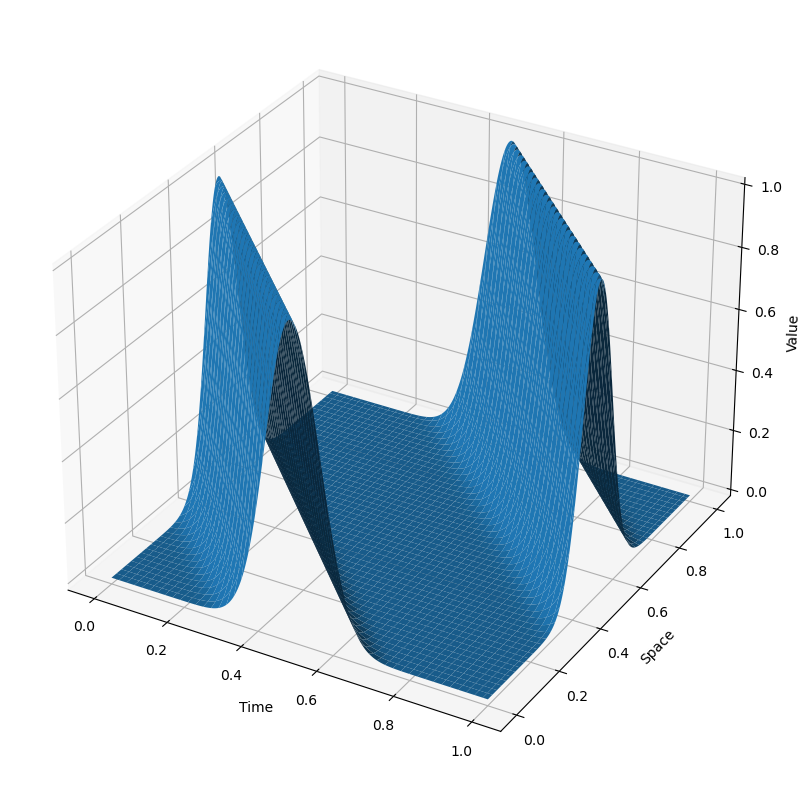

a is postive


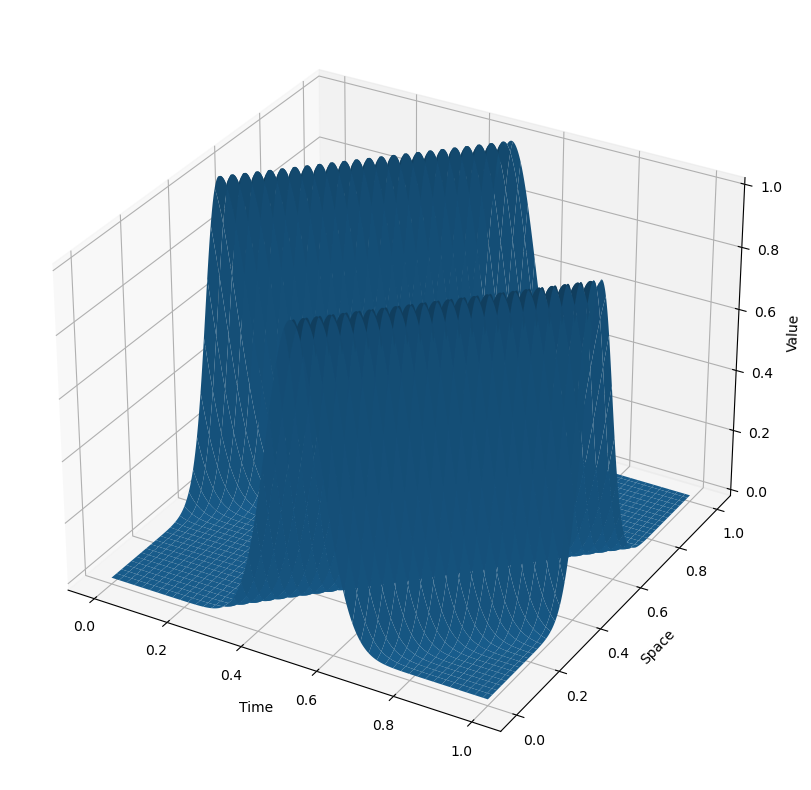

In [46]:
a = -1
N = 1000
M = 1000
for j in range(2):
    if a > 0:
        print("a is postive")
    else:
        print("a is negative")
    
    Xgrid = np.linspace(0, 1, N+1)
    g0 = pulse(Xgrid) #np.zeros(N)
    BC = np.zeros(M)
    Y, Xgrid, tgrid = LaxWensolve(g0, 1, N, M, a)
    plot3D(Y, Xgrid, tgrid)
    # Använd nedanstående för att visa propagering 
    # for i in range(5):      
    #     plt.plot(Xgrid, Y[i*100,:])
    #     plt.title("Time step is " + str(i*100))
    #     plt.xlabel("X-coordinate")
    #     plt.ylabel("Amplitude")
    #     plt.grid()
    #     plt.show()
    a = -a  




    







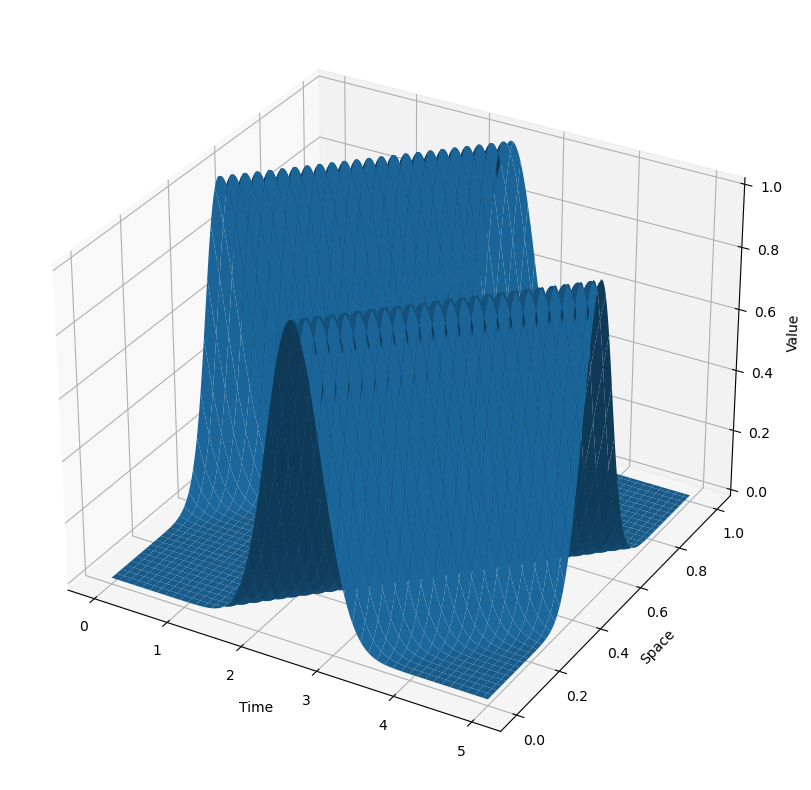

Text(0.5, 1.0, 'Om a*mu är likamed 1 blir nästan konstant')

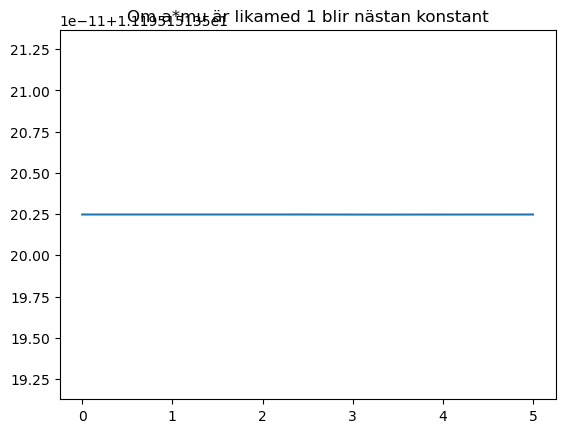

In [49]:
N = 1000
M = 1000
tend = 5
CFL = 1
a = cala(N, M, tend, CFL) 
Xgrid = np.linspace(0, 1, N+1)
g0 = pulse(Xgrid)
Y, Xgrid, tgrid = LaxWensolve(g0, tend, N, M, a)
plot3D(Y, Xgrid, tgrid)

RMS = np.zeros(M+1)

for i in range(M+1):
    RMS[i] = la.norm(Y[i,:])

plt.figure()
plt.plot(tgrid, RMS)
plt.title("Om a*mu är likamed 1 blir nästan konstant")
# om a*mu är är större än 1 blir det instabilt, om det är mindre än 1 blir det stabilt men minskar i amplitud (pyttelite)